<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/5_3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.3 : Forward Propogation, Backward propogation and Computational Graphs

In [ ]:
import torch
import torch.nn as nn

## Ex 5.3

### Q4:

In [ ]:
a = torch.randn(5, 4, 3)
a = a.reshape(-1)
print(a.shape)

torch.Size([60])


In [ ]:
# let's compute for one training examples
x = torch.randn(100)
y = torch.rand(10)

W1 = torch.randn(10, 100, requires_grad=True)
b1 = torch.randn(1, requires_grad=True)

W2 = torch.randn(10, 10, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)

In [ ]:
relu = nn.ReLU()
o1 = relu(torch.mv(W1, x) + b1)
o2 = torch.mv(W2, o1) + b2

In [ ]:
lambd = 4

In [ ]:
def l2_penalty(w):
  
  w = w.reshape(-1)
  return ((w ** 2).sum() / 2)

In [ ]:
criterion = nn.MSELoss()
loss1 = criterion(o2, y)
loss2 = (l2_penalty(W1) + l2_penalty(W2)) * (lambd)
J = loss1 + loss2

In [ ]:
J.backward(create_graph=True) # to compute higher order derivatives
print(W1.grad, W2.grad, b1.grad, b2.grad)

In [ ]:
torch.autograd.backward??

In [ ]:
J.backward()

In [ ]:
print(W1.grad.shape, b1.grad.shape, W2.grad.shape, b2.grad.shape)

torch.Size([10, 100]) torch.Size([1]) torch.Size([10, 10]) torch.Size([1])


# 5.4 : Numerical Stability and Initialization

In [ ]:
%matplotlib inline
import torch

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 8,4
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

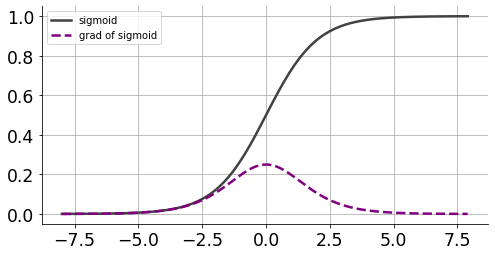

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))
plt.grid()
plt.plot(x.detach(), y.detach(), label='sigmoid')
plt.plot(x.detach(), x.grad, color = 'purple', linestyle='dashed', label='grad of sigmoid')
plt.legend();

In [ ]:
M = torch.normal(0, 1, (4, 4))
print(f"a single matrix M :\n\n{M}\n\n")
for i in range(100):
  M = torch.mm(M, torch.normal(0, 1, (4, 4)))

print(f"After multiplying 100 matrices : \n\n{M}")

a single matrix M :

tensor([[ 1.0475,  1.1577, -1.3939, -1.2142],
        [ 2.6744,  0.7667, -0.8972,  1.7625],
        [ 0.0703,  0.7508,  0.2826,  1.4438],
        [-1.2157,  1.5395, -0.2512, -1.1057]])


After multiplying 100 matrices : 

tensor([[ 3.1017e+25, -1.5944e+25,  2.1409e+25, -2.5315e+25],
        [-7.9989e+25,  4.1119e+25, -5.5212e+25,  6.5284e+25],
        [-1.1334e+26,  5.8263e+25, -7.8232e+25,  9.2503e+25],
        [-5.0121e+25,  2.5765e+25, -3.4596e+25,  4.0907e+25]])


In [ ]:
M = torch.rand(4, 4)
print(f"a single matrix M : {M}")
for i in range(100):
  M = torch.mm(M, torch.rand(4, 4))

print(f"After multiplying 100 matrices : \n{torch.log(M)}")

a single matrix M : tensor([[0.0825, 0.3366, 0.7512, 0.2112],
        [0.6184, 0.8144, 0.8999, 0.0811],
        [0.0394, 0.6264, 0.8478, 0.8560],
        [0.0965, 0.0373, 0.8832, 0.8185]])
After multiplying 100 matrices : 
tensor([[67.1996, 67.8132, 67.3548, 67.6871],
        [67.7791, 68.3927, 67.9343, 68.2665],
        [67.6973, 68.3109, 67.8524, 68.1847],
        [67.3644, 67.9780, 67.5196, 67.8519]])


In [ ]:
import numpy as np

In [ ]:
np.exp(710)

<ipython-input-43-12355e2e0515>:1: RuntimeWarning: overflow encountered in exp
  np.exp(710)


inf

# 5.6 Droput

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
assert -1 <= 0 <= -3

AssertionError: ignored

In [ ]:
a = torch.ones(1, 2, 3)
a.shape
b = torch.randn(a.shape)
print(b.shape)

torch.Size([1, 2, 3])


In [ ]:
(b > 0.5).float()

tensor([[[0., 1., 0.],
         [1., 0., 1.]]])

In [ ]:
def dropout_layer(X, dropout):
  # droput is the probability of dropping the nodes
  assert 0 <= dropout <= 1
  if dropout == 1:
    return torch.zeros_like(X)
  mask = (torch.rand(X.shape) > dropout).float()
  ans = (mask * X) / (1.0 - dropout)
  return ans

In [ ]:
X = torch.arange(16, dtype=torch.float32).reshape(2, 8)
X

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [ ]:
print("dropout = 0 : ", dropout_layer(X, 0))

dropout = 0 :  tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])


In [ ]:
print("dropout = 1 : ", dropout_layer(X, 1))

dropout = 1 :  tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
print("dropout = 0.5 : ", dropout_layer(X, 0.5))

dropout = 0.5 :  tensor([[ 0.,  2.,  4.,  0.,  8.,  0., 12., 14.],
        [ 0., 18.,  0.,  0.,  0., 26.,  0., 30.]])


In [ ]:
class DropoutMLPScratch(d2l.Classifier):

  def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
               dropout_1, dropout_2, lr):
    super().__init__()
    self.save_hyperparameters()
    self.lin1 = nn.LazyLinear(num_hiddens_1)
    self.lin2 = nn.LazyLinear(num_hiddens_2)
    self.lin3 = nn.LazyLinear(num_outputs)
    self.relu = nn.ReLU()

  def forward(self, X):
    H1 = self.relu(self.lin1(X.reshape(X.shape[0], -1)))
    if self.training:
      H1 = dropout_layer(H1, self.dropout_1)
    H2 = self.relu(self.lin2(H1))
    if self.training:
      H2 = dropout_layer(H2, self.dropout_2)
    return self.lin3(H2)

In [ ]:
hparams = {"num_outputs" : 10,
           "num_hiddens_1" : 256,
           "num_hiddens_2" : 256,
           "dropout_1" : 0.5,
           "dropout_2" : 0.5,
           "lr" : 0.1}

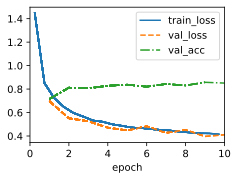

In [ ]:
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
nn.Dropout??

In [ ]:
class DropoutMLP(d2l.Classifier):

  def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
               dropout_1, dropout_2, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens_1),
                             nn.ReLU(),
                             nn.Dropout(dropout_1),
                             nn.LazyLinear(num_hiddens_2),
                             nn.ReLU(),
                             nn.Dropout(dropout_2),
                             nn.LazyLinear(num_outputs))

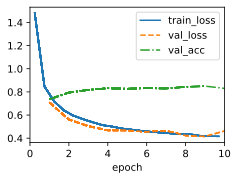

In [ ]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

## Ex 5.6:

### Q1:

by interchanging the dropout probs : model doesn't seem to make a differnce

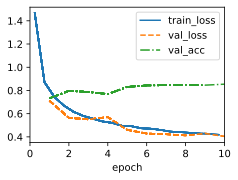

In [ ]:
hparams = {"num_outputs" : 10,
           "num_hiddens_1" : 256,
           "num_hiddens_2" : 256,
           "dropout_1" : 0.3,
           "dropout_2" : 0.7,
           "lr" : 0.1}

model = DropoutMLP(**hparams)
trainer.fit(model, data)

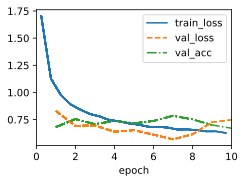

In [ ]:
hparams = {"num_outputs" : 10,
           "num_hiddens_1" : 256,
           "num_hiddens_2" : 256,
           "dropout_1" : 0.9,
           "dropout_2" : 0.1,
           "lr" : 0.1}

model = DropoutMLP(**hparams)
trainer.fit(model, data)

### Q2: accuracy more or less remained same

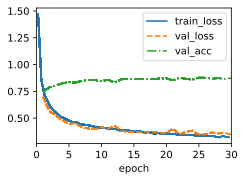

In [ ]:
hparams = {"num_outputs" : 10,
           "num_hiddens_1" : 256,
           "num_hiddens_2" : 256,
           "dropout_1" : 0.5,
           "dropout_2" : 0.5,
           "lr" : 0.1}

model = DropoutMLP(**hparams)
trainer = d2l.Trainer(max_epochs=30)
trainer.fit(model, data)

### Q3:

variance will become smaller since we are focusing on spreading out the values among all the feature's weights.

### Q4:

dropout and weight deacy together : acc = 80%

dropout alone : acc = 84.5%

only weight decay : acc = 76.2%

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                  download=True,
                                                  train=True,
                                                  transform=transforms.ToTensor())

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                 download=False,
                                                 train=False,
                                                 transform=transforms.ToTensor())

In [ ]:
print(len(train_dataset), len(test_dataset))

60000 10000


In [ ]:
torch.utils.data.DataLoader??

In [ ]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=batch_size,
                                               shuffle=False,
                                               num_workers=4)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
a = next(iter(train_dataloader))
b, c = a
print(b.shape, c.shape)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([256, 1, 28, 28]) torch.Size([256])


In [ ]:
nn.Linear??

In [111]:
class Dropout1(d2l.Classifier):

  '''
  with dropout and weight decay
  '''

  def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
               dropout_1, dropout_2, lr):
    super().__init__()
    self.save_hyperparameters()
    self.lin = nn.Sequential(nn.Flatten(),
                              nn.Linear(784, num_hiddens_1),
                              nn.ReLU(),
                              nn.Dropout(dropout_1),
                              nn.Linear(num_hiddens_1, num_hiddens_2),
                              nn.ReLU(),
                              nn.Dropout(dropout_2),
                              nn.Linear(num_hiddens_2, num_outputs))
    
  def forward(self, X):
    return self.lin(X)

In [112]:
num_outputs = 10
num_hiddens_1 = 256
num_hiddens_2 = 256
dropout_1 = 0.2
dropout_2 = 0.5
lr = 0.1
batch_size = 256
max_epochs= 10

In [113]:
model = Dropout1(num_outputs, num_hiddens_1, num_hiddens_2, dropout_1, dropout_2, lr)

In [61]:
for i, p in enumerate(model.parameters()):
  print(p.shape)
  print("-" * 100)
  if i == 0:
    t = p.detach()


torch.Size([256, 784])
----------------------------------------------------------------------------------------------------
torch.Size([256])
----------------------------------------------------------------------------------------------------
torch.Size([256, 256])
----------------------------------------------------------------------------------------------------
torch.Size([256])
----------------------------------------------------------------------------------------------------
torch.Size([10, 256])
----------------------------------------------------------------------------------------------------
torch.Size([10])
----------------------------------------------------------------------------------------------------


In [63]:
t.shape

torch.Size([256, 784])

In [64]:
t.reshape(-1).shape

torch.Size([200704])

In [65]:
t = t.reshape(-1)
ans = (t ** 2).sum() / 2
print(ans)

tensor(42.6112)


In [68]:
int(4/2)

2

In [114]:
# loss and optimizer
optimizer = torch.optim.SGD(model.parameters(), model.lr, weight_decay=0.01)

def loss(y_hat, y, model):
  crit = nn.CrossEntropyLoss()
  l1 = crit(y_hat, y)

  l = torch.zeros(3)
  for i, p in enumerate(model.parameters()):
    if (i%2) == 0:
      p = p.reshape(-1)
      t = (p ** 2).sum() / 2
      l[int(i/2)] = t
    
  l2 = l.sum() * model.lambd
  return (l1 + l2)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [115]:
# trainer loop
for epoch in range(max_epochs):

  for i, (features, targets) in enumerate(train_dataloader):

    # forward pass : y_hat and loss
    outputs = model.forward(features)
    l = criterion(outputs, targets)

    # backward pass : gradient
    l.backward()

    # update the params
    optimizer.step()

    # zero the grad : 
    optimizer.zero_grad()

    if (i%100) == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {l.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch : 1/10, step : 1/235, loss = 2.3004
epoch : 1/10, step : 101/235, loss = 0.9337
epoch : 1/10, step : 201/235, loss = 0.7873
epoch : 2/10, step : 1/235, loss = 0.7454
epoch : 2/10, step : 101/235, loss = 0.7367
epoch : 2/10, step : 201/235, loss = 0.7323
epoch : 3/10, step : 1/235, loss = 0.6447
epoch : 3/10, step : 101/235, loss = 0.6408
epoch : 3/10, step : 201/235, loss = 0.6242
epoch : 4/10, step : 1/235, loss = 0.6707
epoch : 4/10, step : 101/235, loss = 0.5713
epoch : 4/10, step : 201/235, loss = 0.5830
epoch : 5/10, step : 1/235, loss = 0.5727
epoch : 5/10, step : 101/235, loss = 0.6061
epoch : 5/10, step : 201/235, loss = 0.5306
epoch : 6/10, step : 1/235, loss = 0.6154
epoch : 6/10, step : 101/235, loss = 0.5138
epoch : 6/10, step : 201/235, loss = 0.6889
epoch : 7/10, step : 1/235, loss = 0.4723
epoch : 7/10, step : 101/235, loss = 0.5588
epoch : 7/10, step : 201/235, loss = 0.5122
epoch : 8/10, step : 1/235, loss = 0.5756
epoch : 8/10, step : 101/235, loss = 0.4846
epoc

In [116]:
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.0
  for features, targets in test_dataloader:

    outputs = model.forward(features)
    _, preds = torch.max(outputs, 1)

    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()
   
  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 80.5400


In [73]:
# using dropout alone : 

model = Dropout1(num_outputs, num_hiddens_1, num_hiddens_2, dropout_1, dropout_2, lr, lambd=0)
optimizer = torch.optim.SGD(model.parameters(), model.lr)

# trainer loop
for epoch in range(max_epochs):

  for i, (features, targets) in enumerate(train_dataloader):

    # forward pass : y_hat and loss
    outputs = model.forward(features)
    l = loss(outputs, targets, model)

    # backward pass : gradient
    l.backward()

    # update the params
    optimizer.step()

    # zero the grad : 
    optimizer.zero_grad()

    if (i%100) == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {l.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch : 1/10, step : 1/235, loss = 2.3027
epoch : 1/10, step : 101/235, loss = 0.8891
epoch : 1/10, step : 201/235, loss = 0.8619
epoch : 2/10, step : 1/235, loss = 0.8228
epoch : 2/10, step : 101/235, loss = 0.6460
epoch : 2/10, step : 201/235, loss = 0.6779
epoch : 3/10, step : 1/235, loss = 0.5975
epoch : 3/10, step : 101/235, loss = 0.6465
epoch : 3/10, step : 201/235, loss = 0.5362
epoch : 4/10, step : 1/235, loss = 0.5686
epoch : 4/10, step : 101/235, loss = 0.6031
epoch : 4/10, step : 201/235, loss = 0.4622
epoch : 5/10, step : 1/235, loss = 0.4686
epoch : 5/10, step : 101/235, loss = 0.4533
epoch : 5/10, step : 201/235, loss = 0.4586
epoch : 6/10, step : 1/235, loss = 0.4175
epoch : 6/10, step : 101/235, loss = 0.5265
epoch : 6/10, step : 201/235, loss = 0.4245
epoch : 7/10, step : 1/235, loss = 0.4293
epoch : 7/10, step : 101/235, loss = 0.4094
epoch : 7/10, step : 201/235, loss = 0.4140
epoch : 8/10, step : 1/235, loss = 0.4433
epoch : 8/10, step : 101/235, loss = 0.4892
epoc

In [74]:
# evaluation : 
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.0
  for features, targets in test_dataloader:

    outputs = model.forward(features)
    _, preds = torch.max(outputs, 1)

    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()
   
  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 84.5900


In [99]:
class MLP(nn.Module):

  def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, lr):
    super().__init__()
    self.lr = lr
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens_1),
                             nn.ReLU(),
                             nn.LazyLinear(num_hiddens_2),
                             nn.ReLU(),
                             nn.LazyLinear(num_outputs))
    
  def forward(self, X):
    return self.net(X)

In [88]:
# loss 
def loss(y_hat, y, model):
  crit = nn.CrossEntropyLoss()
  l1 = crit(y_hat, y)

  l = torch.zeros(3)
  for i, p in enumerate(model.parameters()):
    if (i%2) == 0:
      t = (p.reshape(-1) ** 2).sum() / 2
      l[int(i/2)] = t
    
  l2 = l.sum() * model.lambd
  # print(f"l1 = {l1.item()}, l2 = {l2.item()}")
  return (l1 + l2)

In [109]:
model = MLP(10, 256, 256, 0.1)
optimizer = torch.optim.SGD(model.parameters(), model.lr, weight_decay = 0.01)
criterion = nn.CrossEntropyLoss()

# trainer loop
for epoch in range(4):

  for i, (features, targets) in enumerate(train_dataloader):

    # forward pass : y_hat and loss
    outputs = model(features)
    l = criterion(outputs, targets)

    # backward pass : gradient
    l.backward()

    # update the params
    optimizer.step()

    # zero the grad : 
    optimizer.zero_grad()

    if (i%100) == 0:
      print(f"epoch : {epoch+1}/{5}, step : {i+1}/{len(train_dataloader)}, loss = {l.item():.4f}")

epoch : 1/5, step : 1/235, loss = 2.3050
epoch : 1/5, step : 101/235, loss = 0.8477
epoch : 1/5, step : 201/235, loss = 0.7679
epoch : 2/5, step : 1/235, loss = 0.8064
epoch : 2/5, step : 101/235, loss = 0.7026
epoch : 2/5, step : 201/235, loss = 0.5320
epoch : 3/5, step : 1/235, loss = 0.4841
epoch : 3/5, step : 101/235, loss = 0.4754
epoch : 3/5, step : 201/235, loss = 0.4887
epoch : 4/5, step : 1/235, loss = 0.6440
epoch : 4/5, step : 101/235, loss = 0.4971
epoch : 4/5, step : 201/235, loss = 0.4985


In [110]:
# evaluation : 
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.0
  for features, targets in test_dataloader:

    outputs = model(features)
    _, preds = torch.max(outputs, 1)

    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()
   
  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 76.2400


In [103]:
def l2_penalty(w):
  a = w.detach()
  a = a.reshape(-1)
  return (a ** 2).sum() / 2

In [107]:
for p in model.parameters():
  print(f"L2 norm of w = {l2_penalty(p)}")

L2 norm of w = 2.0647053718566895
L2 norm of w = 0.008561530150473118
L2 norm of w = 2.038980484008789
L2 norm of w = 0.009813288226723671
L2 norm of w = 2.0776162147521973
L2 norm of w = 0.06345117837190628


### Q6:

acc = 82% when i applied Dropout before activation function

In [117]:
class Dropout2(nn.Module):

  def __init__(self, num_outputs ,num_hiddens_1, num_hiddens_2, 
               dropout_1, dropout_2, lr):
    super().__init__()
    self.lr = lr
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens_1),
                             nn.Dropout(dropout_1),
                             nn.ReLU(),
                             nn.LazyLinear(num_hiddens_2),
                             nn.Dropout(dropout_2),
                             nn.ReLU(),
                             nn.LazyLinear(num_outputs))
    

  def forward(self, X):
    return self.net(X)

In [120]:
model = Dropout2(10, 256, 256, 0.5, 0.5, 0.1)
optimizer = torch.optim.SGD(model.parameters(), model.lr)
crit = nn.CrossEntropyLoss()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [121]:
# training loop
for epoch in range(max_epochs):
  for i, (features, targets) in enumerate(train_dataloader):
    outputs = model(features)
    loss = crit(outputs, targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%100 == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {loss.item():.4f}")

epoch : 1/10, step : 1/235, loss = 2.2933
epoch : 1/10, step : 101/235, loss = 1.0281
epoch : 1/10, step : 201/235, loss = 0.7973
epoch : 2/10, step : 1/235, loss = 0.7351
epoch : 2/10, step : 101/235, loss = 0.7163
epoch : 2/10, step : 201/235, loss = 0.6902
epoch : 3/10, step : 1/235, loss = 0.6372
epoch : 3/10, step : 101/235, loss = 0.5658
epoch : 3/10, step : 201/235, loss = 0.4665
epoch : 4/10, step : 1/235, loss = 0.5491
epoch : 4/10, step : 101/235, loss = 0.4445
epoch : 4/10, step : 201/235, loss = 0.5649
epoch : 5/10, step : 1/235, loss = 0.5742
epoch : 5/10, step : 101/235, loss = 0.5035
epoch : 5/10, step : 201/235, loss = 0.4951
epoch : 6/10, step : 1/235, loss = 0.4568
epoch : 6/10, step : 101/235, loss = 0.4587
epoch : 6/10, step : 201/235, loss = 0.5001
epoch : 7/10, step : 1/235, loss = 0.4365
epoch : 7/10, step : 101/235, loss = 0.4815
epoch : 7/10, step : 201/235, loss = 0.5187
epoch : 8/10, step : 1/235, loss = 0.5131
epoch : 8/10, step : 101/235, loss = 0.5735
epoc

In [122]:
# evaluation : 
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.0
  for features, targets in test_dataloader:

    outputs = model(features)
    _, preds = torch.max(outputs, 1)

    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()
   
  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 82.1600


### Q7:

by adding normal(0, 0.01) noise to the output of every layer : acc = 84%

normal(0, 0.001) noise : acc = 84.75%

In [130]:
class Try(nn.Module):

  def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, 
               dropout_1, dropout_2, lr):
    super().__init__()
    self.lr = lr
    self.flatten = nn.Flatten()
    self.lin1 = nn.LazyLinear(num_hiddens_1)
    self.lin2 = nn.LazyLinear(num_hiddens_2)
    self.lin3 = nn.LazyLinear(num_outputs)
    self.relu = nn.ReLU()
    
  def forward(self, X):
    o1 = self.relu(self.lin1(self.flatten(X)))
    t1, t2 = o1.shape
    o2 = o1 + torch.normal(0, 0.001, (t1, t2))
    o3 = self.relu(self.lin2(o2))
    t1, t2 = o3.shape
    o4 = o3 + torch.normal(0, 0.001, (t1, t2))
    o5 = self.lin3(o4)
    t, t2 = o5.shape
    o6 = o5 + torch.normal(0, 0.001, (t1, t2))
    return o6

In [131]:
model = Try(10, 256, 256, 0.5, 0.5, 0.1)
optimizer = torch.optim.SGD(model.parameters(), model.lr)
crit = nn.CrossEntropyLoss()

In [132]:
# training loop
for epoch in range(max_epochs):
  for i, (features, targets) in enumerate(train_dataloader):
    outputs = model.forward(features)
    loss = crit(outputs, targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%100 == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {loss.item():.4f}")

epoch : 1/10, step : 1/235, loss = 2.3060
epoch : 1/10, step : 101/235, loss = 0.8626
epoch : 1/10, step : 201/235, loss = 0.5837
epoch : 2/10, step : 1/235, loss = 0.6438
epoch : 2/10, step : 101/235, loss = 0.6172
epoch : 2/10, step : 201/235, loss = 0.6351
epoch : 3/10, step : 1/235, loss = 0.5430
epoch : 3/10, step : 101/235, loss = 0.5903
epoch : 3/10, step : 201/235, loss = 0.6331
epoch : 4/10, step : 1/235, loss = 0.4637
epoch : 4/10, step : 101/235, loss = 0.4596
epoch : 4/10, step : 201/235, loss = 0.4049
epoch : 5/10, step : 1/235, loss = 0.4734
epoch : 5/10, step : 101/235, loss = 0.3907
epoch : 5/10, step : 201/235, loss = 0.4510
epoch : 6/10, step : 1/235, loss = 0.4206
epoch : 6/10, step : 101/235, loss = 0.5364
epoch : 6/10, step : 201/235, loss = 0.4605
epoch : 7/10, step : 1/235, loss = 0.4122
epoch : 7/10, step : 101/235, loss = 0.4291
epoch : 7/10, step : 201/235, loss = 0.4551
epoch : 8/10, step : 1/235, loss = 0.3072
epoch : 8/10, step : 101/235, loss = 0.3973
epoc

In [133]:
# evaluation : 
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.0
  for features, targets in test_dataloader:

    outputs = model(features)
    _, preds = torch.max(outputs, 1)

    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()
   
  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 84.7500
